## Import Basic Libraries

In [1]:
import pandas as pd

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from keras.models import Sequential
from keras.layers import Dense

In [4]:
from tensorflow.keras.models import Sequential

In [5]:
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [8]:
data = pd.read_excel("abuja-weather-data.xlsx")

In [9]:
data.head()

,temp,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,sunrise,sunset,cloud,description,region,Energy Consumption (GWh)
0,313.34,313.34,313.34,1006,28,1006,985,0.64,183,2024-02-21 05:50:33,2024-02-21 17:45:20,41,Clouds,Abuja,246.0
1,313.60,313.60,313.60,1006,30,1006,1001,1.35,213,2024-02-21 05:49:15,2024-02-21 17:44:09,31,Clouds,Abuja,250.0
2,313.61,313.61,313.61,1005,29,1005,998,1.37,214,2024-02-21 05:49:29,2024-02-21 17:44:14,34,Clouds,Abuja,244.0
3,312.30,312.30,312.30,1006,28,1006,971,0.67,197,2024-02-21 05:50:07,2024-02-21 17:44:44,36,Clouds,Abuja,236.0
4,313.58,313.58,313.58,1006,29,1006,997,1.28,211,2024-02-21 05:49:35,2024-02-21 17:44:23,33,Clouds,Abuja,212.0


# Data Preprocessing

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   temp                      123 non-null    float64       
 1   temp_min                  123 non-null    float64       
 2   temp_max                  123 non-null    float64       
 3   pressure                  123 non-null    int64         
 4   humidity                  123 non-null    int64         
 5   sea_level                 123 non-null    int64         
 6   ground_level              123 non-null    int64         
 7   wind_speed                123 non-null    float64       
 8   wind_degree               123 non-null    int64         
 9   sunrise                   123 non-null    datetime64[ns]
 10  sunset                    123 non-null    datetime64[ns]
 11  cloud                     123 non-null    int64         
 12  description           

In [11]:
data['total_sunshine_hours'] = (data['sunset'] - data['sunrise']).dt.total_seconds() / 3600


In [12]:
data.head()

,temp,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,sunrise,sunset,cloud,description,region,Energy Consumption (GWh),total_sunshine_hours
0,313.34,313.34,313.34,1006,28,1006,985,0.64,183,2024-02-21 05:50:33,2024-02-21 17:45:20,41,Clouds,Abuja,246.0,11.913056
1,313.60,313.60,313.60,1006,30,1006,1001,1.35,213,2024-02-21 05:49:15,2024-02-21 17:44:09,31,Clouds,Abuja,250.0,11.915000
2,313.61,313.61,313.61,1005,29,1005,998,1.37,214,2024-02-21 05:49:29,2024-02-21 17:44:14,34,Clouds,Abuja,244.0,11.912500
3,312.30,312.30,312.30,1006,28,1006,971,0.67,197,2024-02-21 05:50:07,2024-02-21 17:44:44,36,Clouds,Abuja,236.0,11.910278
4,313.58,313.58,313.58,1006,29,1006,997,1.28,211,2024-02-21 05:49:35,2024-02-21 17:44:23,33,Clouds,Abuja,212.0,11.913333


In [13]:
data = data.drop(["sunrise", "sunset", "temp", "region"], axis=1)

In [14]:
data.head()

,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,description,Energy Consumption (GWh),total_sunshine_hours
0,313.34,313.34,1006,28,1006,985,0.64,183,41,Clouds,246.0,11.913056
1,313.60,313.60,1006,30,1006,1001,1.35,213,31,Clouds,250.0,11.915000
2,313.61,313.61,1005,29,1005,998,1.37,214,34,Clouds,244.0,11.912500
3,312.30,312.30,1006,28,1006,971,0.67,197,36,Clouds,236.0,11.910278
4,313.58,313.58,1006,29,1006,997,1.28,211,33,Clouds,212.0,11.913333


In [15]:
data.describe()

,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,Energy Consumption (GWh),total_sunshine_hours
count,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,305.116667,305.116667,1009.495935,38.308943,1009.495935,998.634146,1.369431,180.699187,75.406504,227.677236,11.933284
std,4.043879,4.043879,1.947567,13.336828,1.947567,8.848699,0.536305,83.564242,33.328430,36.967555,0.013912
min,298.910000,298.910000,1005.000000,19.000000,1005.000000,971.000000,0.440000,3.000000,6.000000,130.000000,11.910278
25%,302.345000,302.345000,1008.000000,30.000000,1008.000000,993.500000,1.025000,140.500000,38.500000,209.000000,11.921111
50%,304.820000,304.820000,1010.000000,32.000000,1010.000000,1002.000000,1.250000,191.000000,94.000000,229.000000,11.932500
75%,305.980000,305.980000,1011.000000,54.500000,1011.000000,1005.000000,1.765000,211.000000,99.500000,251.000000,11.946250
max,313.800000,313.800000,1012.000000,61.000000,1012.000000,1007.000000,3.330000,343.000000,100.000000,317.000000,11.955833


In [16]:
data.isnull().sum()

temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
sea_level                   0
ground_level                0
wind_speed                  0
wind_degree                 0
cloud                       0
description                 0
Energy Consumption (GWh)    0
total_sunshine_hours        0
dtype: int64

In [17]:
data.isna().sum()

temp_min                    0
temp_max                    0
pressure                    0
humidity                    0
sea_level                   0
ground_level                0
wind_speed                  0
wind_degree                 0
cloud                       0
description                 0
Energy Consumption (GWh)    0
total_sunshine_hours        0
dtype: int64

In [18]:
data.head()

,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,description,Energy Consumption (GWh),total_sunshine_hours
0,313.34,313.34,1006,28,1006,985,0.64,183,41,Clouds,246.0,11.913056
1,313.60,313.60,1006,30,1006,1001,1.35,213,31,Clouds,250.0,11.915000
2,313.61,313.61,1005,29,1005,998,1.37,214,34,Clouds,244.0,11.912500
3,312.30,312.30,1006,28,1006,971,0.67,197,36,Clouds,236.0,11.910278
4,313.58,313.58,1006,29,1006,997,1.28,211,33,Clouds,212.0,11.913333


## Data Visualization

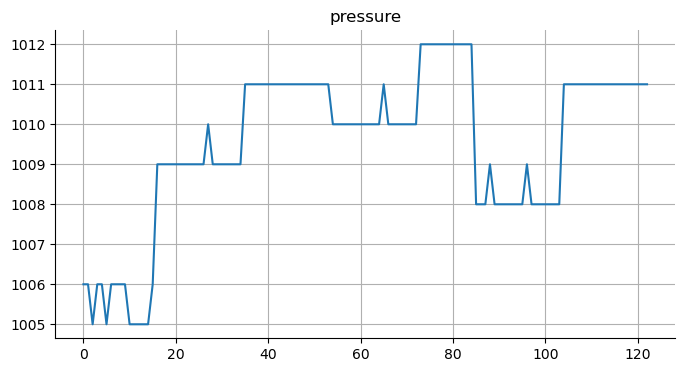

In [19]:
# @title pressure

from matplotlib import pyplot as plt
data['pressure'].plot(kind='line', figsize=(8, 4), title='pressure')
plt.grid()
plt.gca().spines[['top', 'right']].set_visible(False)

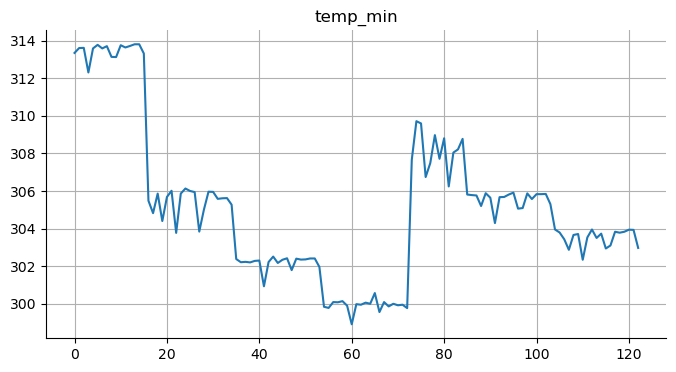

In [20]:
# @title temp_min

from matplotlib import pyplot as plt
data['temp_min'].plot(kind='line', figsize=(8, 4), title='temp_min')
plt.grid()
plt.gca().spines[['top', 'right']].set_visible(False)

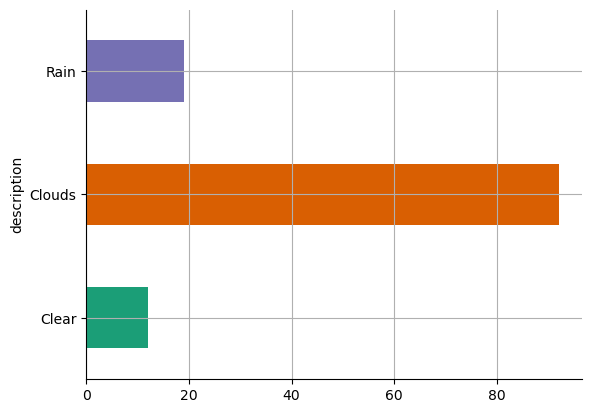

In [21]:
# @title description

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('description').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.grid()
plt.gca().spines[['top', 'right',]].set_visible(False)

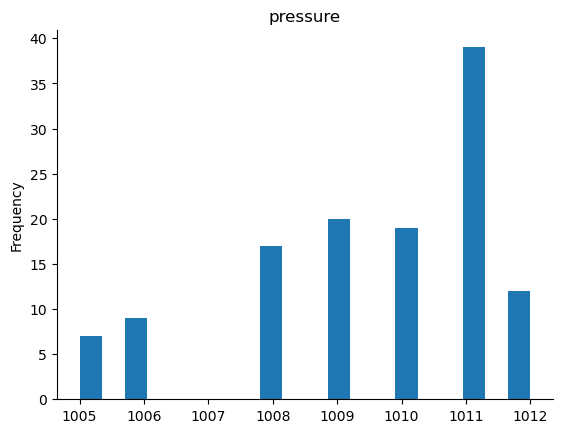

In [22]:
# @title pressure

from matplotlib import pyplot as plt
data['pressure'].plot(kind='hist', bins=20, title='pressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

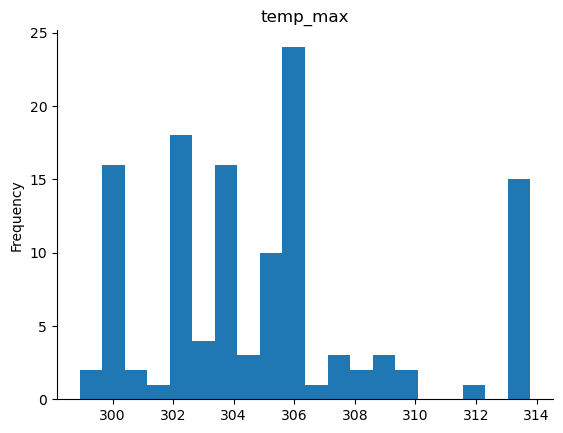

In [23]:
# @title temp_max

from matplotlib import pyplot as plt
data['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

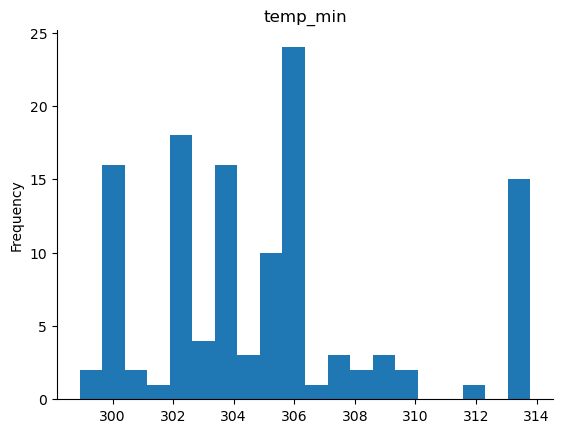

In [24]:
# @title temp_min

from matplotlib import pyplot as plt
data['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

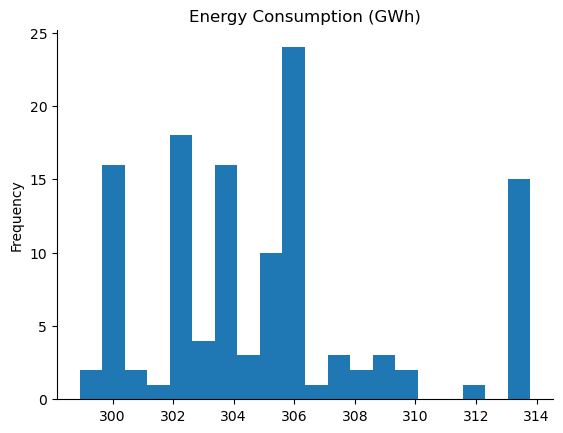

In [25]:
from matplotlib import pyplot as plt
data['temp_max'].plot(kind='hist', bins=20, title='Energy Consumption (GWh)')
plt.gca().spines[['top', 'right',]].set_visible(False)

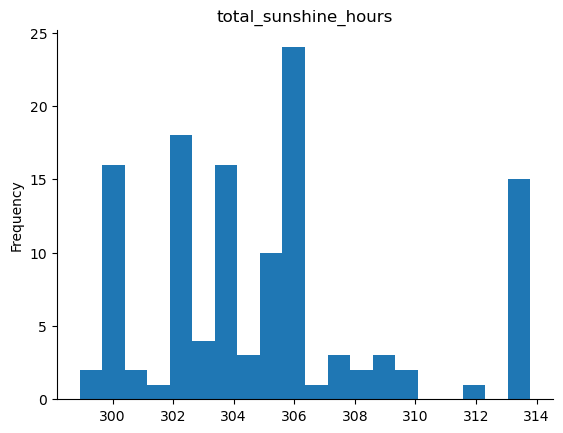

In [26]:
# @title temp_min

from matplotlib import pyplot as plt
data['temp_min'].plot(kind='hist', bins=20, title='total_sunshine_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Manipulation

In [27]:
 data.head()

,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,description,Energy Consumption (GWh),total_sunshine_hours
0,313.34,313.34,1006,28,1006,985,0.64,183,41,Clouds,246.0,11.913056
1,313.60,313.60,1006,30,1006,1001,1.35,213,31,Clouds,250.0,11.915000
2,313.61,313.61,1005,29,1005,998,1.37,214,34,Clouds,244.0,11.912500
3,312.30,312.30,1006,28,1006,971,0.67,197,36,Clouds,236.0,11.910278
4,313.58,313.58,1006,29,1006,997,1.28,211,33,Clouds,212.0,11.913333


In [28]:
data.description.unique()

array(['Clouds', 'Rain', 'Clear'], dtype=object)

In [31]:
one_hot_encoded_data = pd.get_dummies(data, columns=['description']).astype(float)

In [32]:
one_hot_encoded_data.head()


,temp_min,temp_max,pressure,humidity,sea_level,ground_level,wind_speed,wind_degree,cloud,Energy Consumption (GWh),total_sunshine_hours,description_Clear,description_Clouds,description_Rain
0,313.34,313.34,1006.0,28.0,1006.0,985.0,0.64,183.0,41.0,246.0,11.913056,0.0,1.0,0.0
1,313.60,313.60,1006.0,30.0,1006.0,1001.0,1.35,213.0,31.0,250.0,11.915000,0.0,1.0,0.0
2,313.61,313.61,1005.0,29.0,1005.0,998.0,1.37,214.0,34.0,244.0,11.912500,0.0,1.0,0.0
3,312.30,312.30,1006.0,28.0,1006.0,971.0,0.67,197.0,36.0,236.0,11.910278,0.0,1.0,0.0
4,313.58,313.58,1006.0,29.0,1006.0,997.0,1.28,211.0,33.0,212.0,11.913333,0.0,1.0,0.0


## Data Spliting